# A Parametric Supervised Learning Framework

In this notebook we will establish a common theoretical framework for many of our supervised learning methods.

## What we will accomplish

In particular we will
- More rigorously define the setup of a parametric supervised learning problem,
- Give a basic outline of how to approach such a problem and
- Discuss predictive and explanatory modeling.

## The framework

We have **data** which is split into **inputs** $\vec{x} \in \mathbb{R}^p$ and **outputs** $y \in \mathbb{R}$.  

In a supervised learning problem we will assume that there is some kind of relationship between $y$ and $\vec{x}$ which takes the form of a statistical model: 

$$
y = f(\vec{x}) + \epsilon,
$$

where 

* $f: \mathbb{R}^p \rightarrow \mathbb{R}$ is some function that we wish to approximate. $f(\vec{x})$ is considered the <i>systematic</i> information that $\vec{x}$ gives about $y$.  
* $\epsilon$ is some kind of random noise which may or may not be independent of $\vec{x}$. The specific kind of noise depends on the problem we are working on. 

Note: data science draws on techniques which come from mathematics, statistics, econometrics, and machine learning.  This has resulted in many ideas being rediscovered independently in the different communities, with different resulting naming and notational conventions.  In particular there are a lot of different names for $\vec{x}$ and $y$:

$\vec{x}$ is known as

* Input variables
* Features
* Independent variables
* Explanatory variables
* Regressors
* Covariates
* Predictors

$y$ is known as

* Output variable
* Target
* Outcome
* Dependent Variable
* Regressand
* Response 

We cannot hope to search over all functions $f: \mathbb{R}^p \to \mathbb{R}$ so we restrict ourselves to functions of a particular form called a **model**.  For instance, the simple linear regression model (which we will discuss next) restricts our search to functions of the form

$$
f_{\beta_0, \beta_1}(x) = \beta_0 + \beta_1 x
$$

Here $\beta_0$ and $\beta_1$ are called **parameters**.  Adjusting the parameters gives us different instances of the model.

We need a way to evaluate the performance of each $f_\beta$ at reproducing the input/output pairs we actually observed in the data. This performance evaluation metric is called a **loss function**.  It will a single real number score $\ell(\beta)$ to each parameter vector $\beta$.

We *fit* the model by finding the parameters which minimize $\ell(\beta)$.

To summarize to do supervised learning we need

* Data which comes in pairs of input measurements and output measurements $(\vec{x}_i, y_i)$ for $i = 1, 2, 3, \dots, n$.
* We select a *model* $f_\beta$ which is the collection of functions we will consider as candidates and is parameterized by some list of numbers $\beta$.
    * This is also sometimes called the *hypothesis class*.  It is the class of hypothesized relationships.
* We select a *loss function* $\ell$ which allows us to judge how any particular $f_\beta$ performs on our data.
* We minimize the loss function to obtain the *fitted model* $\hat{f}$ which has parameters $\hat{\beta}$.
    * Note:  Often for "classic" machine learning algorithms the minimum is unique and can be found to high precision. This is not the case for all models:  we will see that Neural Networks often have extremely complex loss landscapes with many local minima and saddles.

## An illustration

It may be useful to see this spelled out with an example.

We will simulate some observations of the relationship between patient weight and blood volume:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")

from sklearn.linear_model import LinearRegression

In [1]:
## Generating systematic and observed data

# The 'systematic' data will be used for graphing the 'true relationship'
X_systematic = np.linspace(0, 100, 1000)
y_systematic = 0.07*X_systematic

# X_obs are uniformly chosen from [20,100].  These will represent weight in kilograms.
X_obs = 20+ 80*np.random.random(100)

# y_obs are generated by adding standard normal noise to 0.07x.
# A volume of less than 1 liter is unrealistic, so I use whichever is larger between 0.07x and 1.
y_obs = np.maximum(0.07 * X_obs + np.random.randn(100), 1)

NameError: name 'np' is not defined

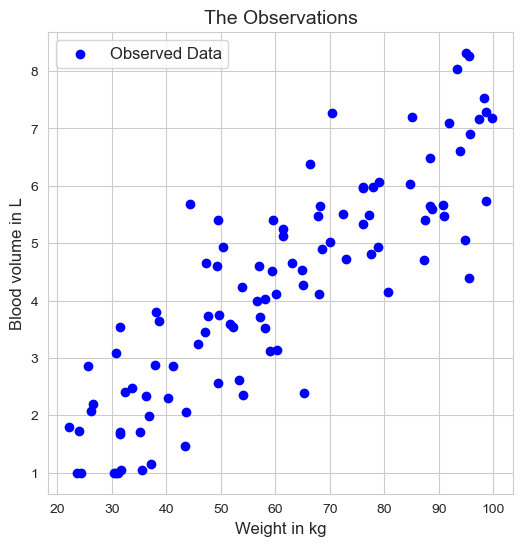

In [3]:
## Plotting data

## Make a figure
plt.figure(figsize=(6,6))

## Plot the observations
plt.scatter(X_obs, 
             y_obs, 
             c='b', 
             label="Observed Data")

## Make labels
plt.xlabel("Weight in kg", fontsize=12)
plt.ylabel("Blood volume in L", fontsize=12)
plt.legend(fontsize=12)
plt.title("The Observations", fontsize=14)

plt.show()

We will now use a simple linear regression model:  

$$
f_{\beta_0,\beta_1}(x) = \beta_0 + \beta_1 x
$$

We will measure performance using *mean squared error* as our loss function.

In [4]:
## Training the algorithm
## It is okay to not understand this code yet. 
## We will do a much deeper dive soon!
reg = LinearRegression()

reg.fit(X_obs.reshape(-1,1), y_obs)

y_pred = reg.predict(X_systematic.reshape(-1,1))

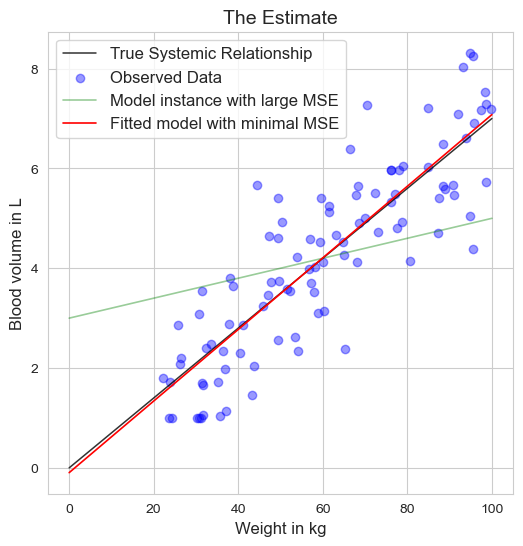

In [5]:
## Plotting data

## Make a figure
plt.figure(figsize=(6,6))

## Plot the "truth"
plt.plot(X_systematic, 
         y_systematic, 
         'k-', 
         linewidth=1.1,
         label="True Systemic Relationship",
         alpha=.8)

## Plot the observations
plt.scatter(X_obs, 
             y_obs, 
             c='b', 
             label="Observed Data",
             alpha = .4)

## Plot a bad estimate
plt.plot(X_systematic, 
         3+ 0.02*X_systematic, 
         linewidth=1.2,
         alpha = 0.4,
         color = "green",
         label="Model instance with large MSE")

## Plot the "estimate"
plt.plot(X_systematic, 
         y_pred, 
         'r-', 
         linewidth=1.2,
         label="Fitted model with minimal MSE")



## Make labels
plt.xlabel("Weight in kg", fontsize=12)
plt.ylabel("Blood volume in L", fontsize=12)
plt.legend(fontsize=12)
plt.title("The Estimate", fontsize=14)

plt.show()

We can notice that the estimate $\hat{f}$ is not precisely the same as $f$ but it is quite close.

## Two main supervised learning modeling goals

We typically adopt this supervised modeling framework with two goals in mind:

1. <b>Making predictions</b> - producing a model/algorithm using training data that can take in new observations and predict an output for them, the goal here is to make the best predictions possible, i.e. the ones that are closest to the actual values,
2. <b>Making inferences</b> - producing a model that helps explain the relationship, if any, between $y$ and $\vec{x}$. In this setting the goal is to understand how changes in $\vec{x}$ impact $y$. One example of the "best" estimate in this setting is finding the model the explains as much of the variance in $y$ while still being parsimonious.

One example I like to use to distinguish between these two goals:  Ptolemy's geocentric system was just as good at predicting the motion of the planets as Copernicus' heliocentric theory, but heliocentrism does a better job of allow us to explain our observations in a conceptually satisfying manner.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.  Modified by Steven Gubkin 2024.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)